In [1]:
import pandas as pd

# Load the wine quality dataset (white wine example)
white_wine_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(white_wine_data_url, sep=";")


In [2]:
##Data decripation vairables explains the wine properities
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
### import required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
## simple data processing

x = data.drop('quality', axis =1)
y = data['quality']

In [6]:
### STEP :1 standardize the data

## z = (x-mu)/SD

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [7]:
x_scaler

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [8]:
## STEP: 2,3,4 dimensional reduction of x_scaler by using PCA

from sklearn.decomposition import PCA

In [9]:
## upload PCA == component
pca = PCA(n_components=0.95)

In [10]:
x_pca = pca.fit_transform(x_scaler)

In [11]:
# Check how many components are kept
print(f"Number of components retained: {x_pca.shape[1]}")

Number of components retained: 9


In [12]:
# Check explained variance ratio
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")

Explained variance by each component: [0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014
 0.06605437 0.05448713 0.03764942]


In [13]:
## split data
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=42)

In [15]:
## import required algorithm model here we are using random forest classifier

from sklearn.ensemble import RandomForestClassifier

In [16]:
model = RandomForestClassifier()

In [17]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
y_pred = model.predict(X_test)
print(y_pred)

[7 8 7 ... 6 7 7]


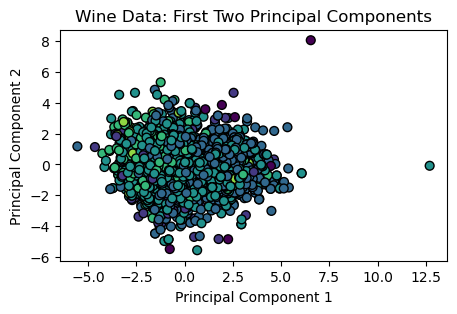

In [42]:
plt.figure(figsize=(5,3))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wine Data: First Two Principal Components')
plt.show()

To understand the graph we have to know the deep in eigenvalues and eigen vectors

# conculsion: 
    From potentially 12 features to fewer principal components, making the model simpler and faster
    
    PCA can help prevent overfitting by eliminating less informative features.
    
    PCA allows us to visualize complex high-dimensional data in 2D or 3D, which is particularly useful for
    exploratory analysis.